# Identify Species From Coverage

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cov_file_sample1 = "v2_output_bed_NS.2209.003.UDP0161_i7---UDP0161_i5.fRS1_.rg.sorted.bam"
cov_file_sample2 = "v2_output_bed_NS.2209.003.UDP0163_i7---UDP0163_i5.fRS757_.rg.sorted.bam"


df1 = pd.read_csv(cov_file_sample1, sep='\t',
                  names=['Species', 'start', 'end', 'sample 1'])
df2 = pd.read_csv(cov_file_sample2, sep='\t',
                  names=['Species', 'start', 'end', 'sample 2'])


df1

,Species,start,end,sample 1
0,Aspergillusfumigatus,6516,6535,64
1,Aspergillusfumigatus,15350,15351,5
2,Aspergillusfumigatus,15351,15370,76
3,Candidaalbicans,0,2,1197
4,Candidaalbicans,2,4,1199
...,...,...,...,...
40717,Pichiakudriavzevii,9524,9540,92
40718,Pichiakudriavzevii,9540,9541,31
40719,Pichiakudriavzevii,9541,9543,29
40720,Pichiakudriavzevii,9692,9711,40


In [3]:
df1_grouped = df1.groupby(['Species']).median()
df1_grouped_dropped = df1_grouped.drop(columns=['start', 'end'])
df1_grouped_dropped_indexed = df1_grouped_dropped.reset_index()

df2_grouped = df2.groupby(['Species']).median()
df2_grouped_dropped = df2_grouped.drop(columns=['start', 'end'])
df2_grouped_dropped_indexed = df2_grouped_dropped.reset_index()

df1_grouped_dropped_indexed

,Species,sample 1
0,Aspergillusfumigatus,64.0
1,Candidaalbicans,845.0
2,Candidaauris,47.5
3,Candidaparapsilosis,164.0
4,Candidatropicalis,133.5
5,Cryptococcusneoformans,102.0
6,Nasakeomycesglabrata,82.0
7,Pichiakudriavzevii,40.0


In [4]:
df_final = pd.DataFrame()

df_final['Species'] = ['A. fumigatus', 'C. albicans', 'C. auris', 'C. parapsilosis', 'C. tropicalis', 'C. neoformans', 'N. glabrata', 'P. kudriavzevii']

df_final['sample 1'] = df1_grouped_dropped_indexed['sample 1']
df_final['sample 2'] = df2_grouped_dropped_indexed['sample 2']

df_final

,Species,sample 1,sample 2
0,A. fumigatus,64.0,34.0
1,C. albicans,845.0,857.0
2,C. auris,47.5,72.5
3,C. parapsilosis,164.0,208.0
4,C. tropicalis,133.5,134.0
5,C. neoformans,102.0,106.0
6,N. glabrata,82.0,94.0
7,P. kudriavzevii,40.0,27.0


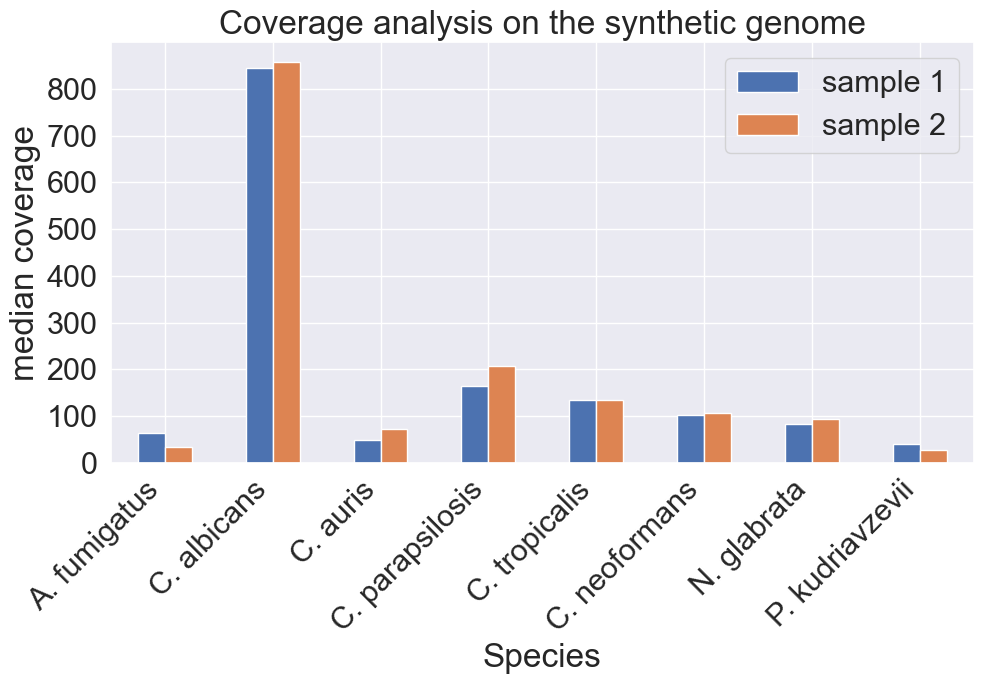

In [11]:
from matplotlib.transforms import Bbox
import seaborn as sns

df_final.plot.bar(x='Species', figsize=(10,7),
                       title="Coverage analysis on the synthetic genome",
                       ylabel="median coverage")

plt.xticks(rotation=45, ha='right')
sns.set(font_scale=1)
plt.savefig('v2_SpeciesIdentification.svg', format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()